
   ____   ______                                  __              
  / __ \ / ____/____   ____   ____   ___   _____ / /_ ____   _____
 / / / // /    / __ \ / __ \ / __ \ / _ \ / ___// __// __ \ / ___/
/ /_/ // /___ / /_/ // / / // / / //  __// /__ / /_ / /_/ // /    
\___\_\____/ \____//_/ /_//_/ /_/ \___/ \___/ \__/ \____//_/     
                                                                  
🧠 Qiskit Connector® for Quantum Backend Realtime Connection


⚛️ Connecting (Open Plan) to least-busy QPU...
----------------------------------------------------------------------------------
⚛️ Connected [Open Plan] → Realtime Least Busy QPU:: [ibm_torino]
- ibm_brisbane
- ibm_sherbrooke
- ibm_torino

🖥️ Least Busy QPU Now: [ibm_torino]
🖥️ Version: 2
🖥️ Qubits Count: 133
🖥️ Backend [ibm_torino] ready for use: ✔️ Yes
🖥️ Operational: Open Plan

⚛️ Getting (Open Plan) Least-busy QPU Processor Info...
----------------------------------------------------------------------------------

--- 🔳  Pro

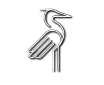

🟢 Heron Quantum Processor

🖥️ Your Plan: Open Plan
🖥️ Least Busy QPU: ibm_torino
🖥️ Backend Status: 🟢 Online


### Shor's Algorithm Quantum Circuit (modexp)

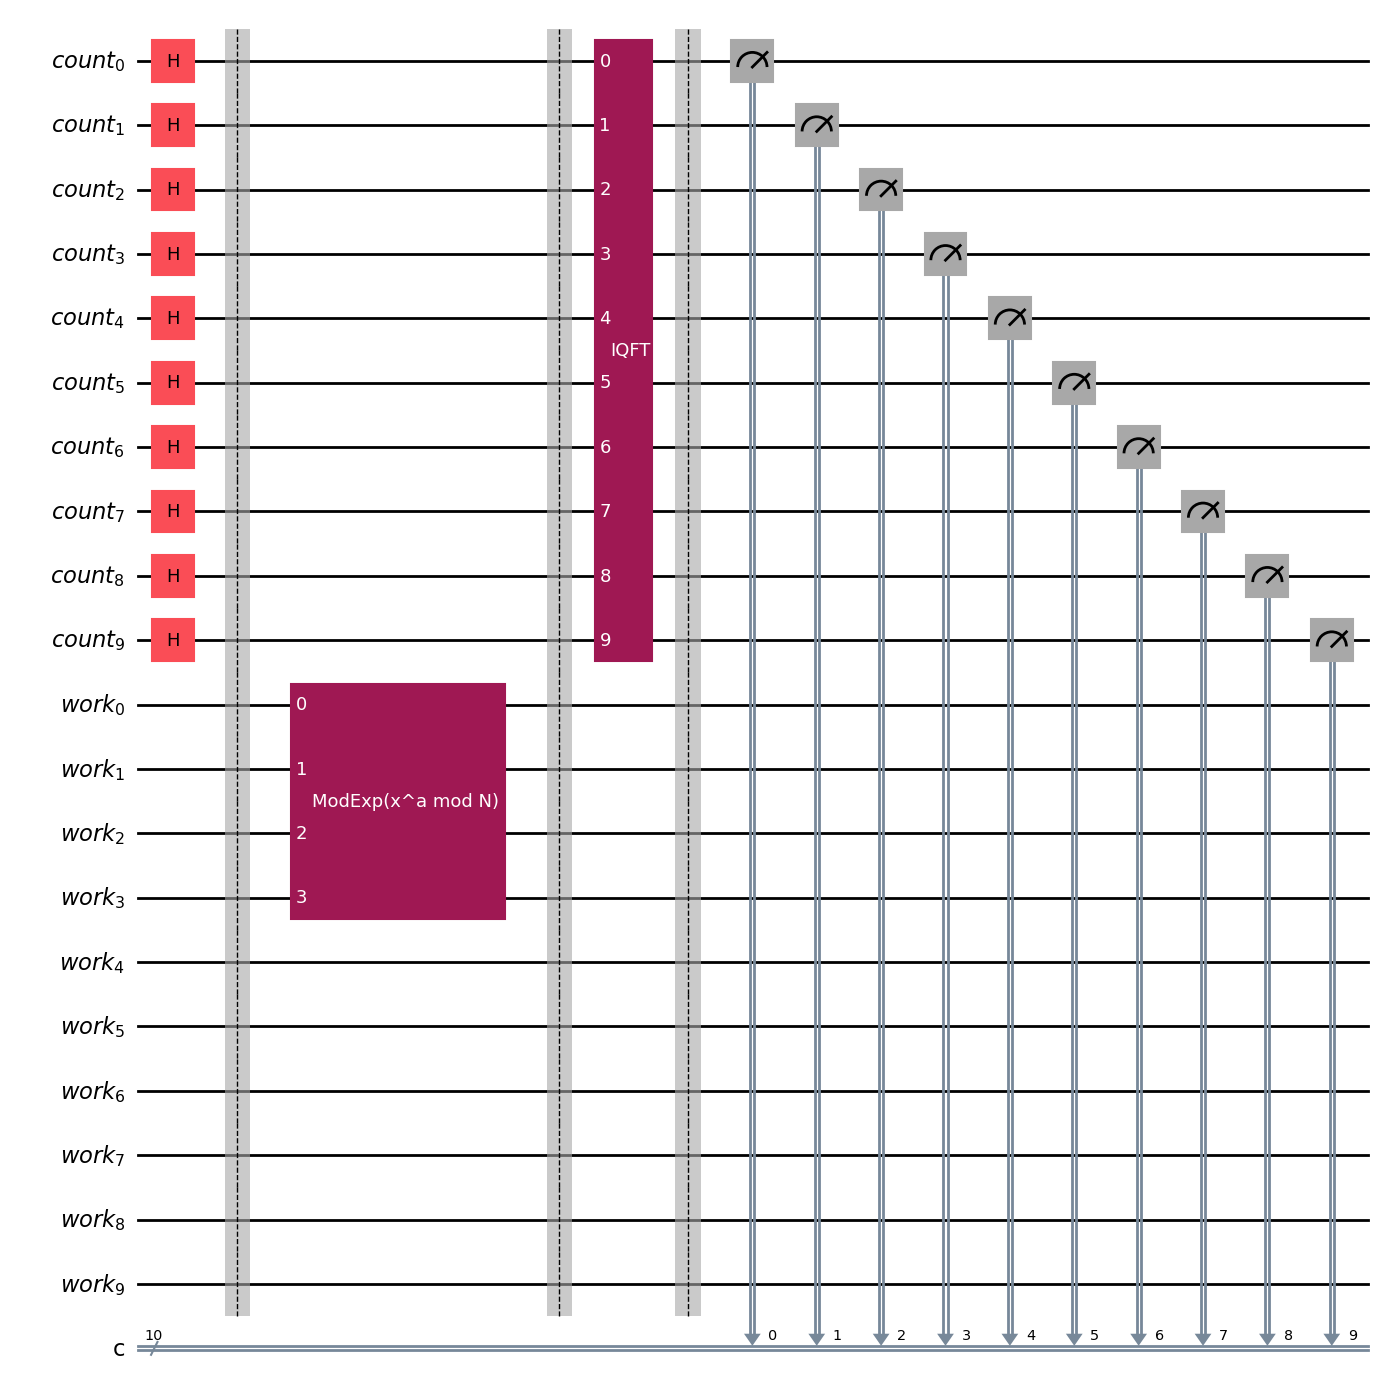


Shor's Algorithm - Measurement Distribution
{'0001100000': 3, '1101011110': 1, '0111100000': 3, '1100001000': 4, '1100100000': 11, '1000100000': 6, '1101011101': 2, '0101100000': 3, '1111110100': 1, '1110100000': 23, '0000001010': 3, '0100001000': 4, '1111100010': 8, '0000000000': 126, '1100001010': 2, '1111110000': 4, '0000000100': 10, '0000000001': 10, '0000000010': 28, '1110000010': 7, '1111101100': 3, '1111000000': 17, '0100000000': 21, '1100000000': 24, '1101101101': 2, '0001010011': 1, '0000100010': 8, '0110010010': 1, '0010000000': 16, '0000100000': 26, '0000010000': 7, '1101100000': 14, '0110001000': 1, '1010101000': 1, '0100010010': 1, '0010001010': 2, '1111100000': 44, '1000000010': 5, '1010010000': 3, '0000101000': 3, '0000001000': 10, '1010000000': 7, '1100010101': 1, '1101000000': 1, '1100010100': 1, '1010011000': 1, '0111100010': 2, '0011111100': 2, '0000001110': 3, '0100000010': 6, '0011101101': 1, '1110011110': 2, '1101100010': 2, '0011001000': 1, '0100010011': 1, '010


📊 **Histogram of Measurement Results**

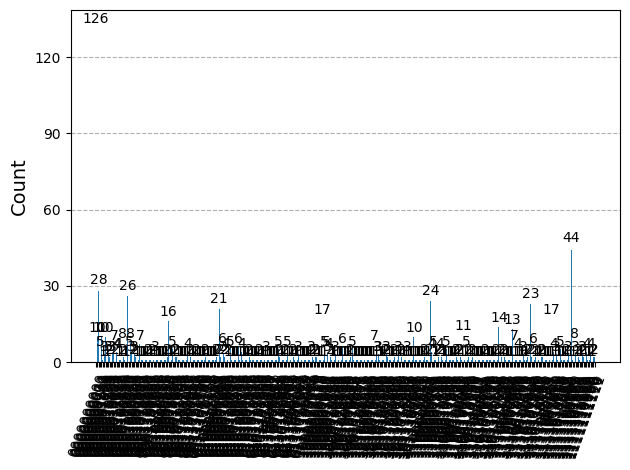

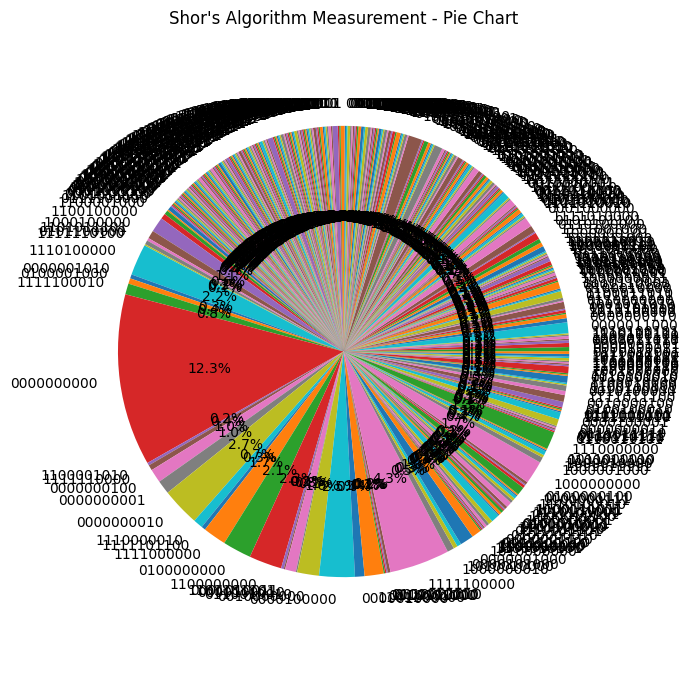

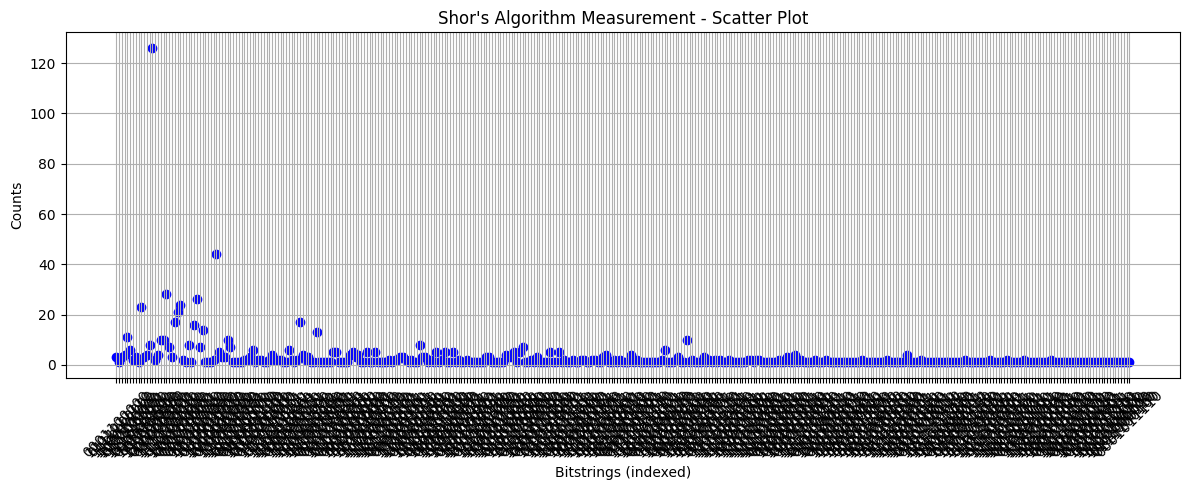


Use Case: Given a large integer N at runtime, factor N using quantum order-finding.
Hypothesis: Classical factoring is slow (sub-exponential), quantum Shor’s is polynomial.
By: Dr. Jeffrey Chijioke-Uche, IBM Quantum Ambassador
IBM Quantum Circuit - June 14, 2025



In [8]:

# @Type: Quantum Software
# @Original Author: Dr. Jeffrey Chijioke-Uche, IBM Quantum Ambassador
# @Platform: Quantum Computing
# @License: Apache License 2.0 & Creative Commons Attribution-NonCommercial 4.0 International
#-----------------------------------------------------------------------------------------------

# After Qiskit Connector® pip install, Import Qiskit Connector®:
from qiskit_connector import QConnectorV2 as connector
from qiskit_connector import QPlanV2 as plan

# Initialize Qiskit Connector®:
current = plan()
backend = connector()

#-----------------------------------HOW TO USE QISKIT CONNECTOR--------------------------------------------------------------


#        This code sample is using the Qiskit Connector to run with a real quantum backend.
# ------------------------------------ QISKIT 2.x CODE SAMPLE ---------------------------------------------------------------
#############################################################################################################################
# This code implements a prototype of Shor's Algorithm — a quantum algorithm designed for efficient integer factorization 
# using quantum order-finding principles. It constructs a quantum circuit consisting of counting and work registers, 
# applies quantum Fourier transforms (QFT and inverse QFT), and includes a placeholder for modular exponentiation. 
# The circuit is executed on IBM real Quantum backends via the Qiskit Connector, supporting both Open and Paid plans for 
# seamless backend access.

# Measurement results from multiple shots (1024) are collected, aggregated, and visualized through histograms, pie charts, 
# and scatter plots. Visualization adapts to the environment, showing rich graphical plots in Jupyter notebooks and 
# text-based histograms in terminal environments.

# [Use Case]:
# The code demonstrates how quantum computing can potentially solve the classical integer factorization problem exponentially 
# faster than known classical algorithms. This prototype is aimed at researchers and developers exploring quantum advantage 
# in cryptography, specifically the factoring problem underlying RSA encryption. By running the quantum order-finding subroutine
#  (central to Shor’s Algorithm) on real quantum hardware, the code offers practical insights into quantum algorithm execution, 
# noise effects, and measurement result analysis using IBM Quantum’s cloud-accessible processors.
##############################################################################################################################

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler, Session
from qiskit.circuit.library import QFT
from datetime import datetime
import time
import sys
from IPython.display import display, Markdown
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

shots = 1024

def in_jupyter():
    try:
        from IPython import get_ipython
        shell = get_ipython().__class__.__name__
        return shell in ('ZMQInteractiveShell', 'Shell')
    except Exception:
        return False

def console_histogram(count_data, max_width=50):
    max_count = max(count_data.values())
    scale = max_width / max_count if max_count > 0 else 1

    print()
    for bitstring, count in sorted(count_data.items()):
        bar = '█' * int(count * scale)
        print(f"{bitstring:>5} | {bar} {count}")

def plot_pie_chart(counts):
    labels = list(counts.keys())
    sizes = list(counts.values())

    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Shor's Algorithm Measurement - Pie Chart")
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
    plt.tight_layout()
    plt.show()

def plot_scatter_plot(counts):
    bitstrings = list(counts.keys())
    frequencies = list(counts.values())
    indices = range(len(bitstrings))

    plt.figure(figsize=(12, 5))
    plt.scatter(indices, frequencies, color='blue')
    plt.title("Shor's Algorithm Measurement - Scatter Plot")
    plt.xlabel("Bitstrings (indexed)")
    plt.ylabel("Counts")
    plt.xticks(indices, bitstrings, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def shors_polynomial_circuit():
    n_count = 10
    work_qubits = 10
    
    counting = QuantumRegister(n_count, name='count')
    work = QuantumRegister(work_qubits, name='work')
    c_reg = ClassicalRegister(n_count, name='c')
    
    qc = QuantumCircuit(counting, work, c_reg)
    
    qc.h(counting)
    
    qc.barrier()
    mod_exp_gate = QFT(num_qubits=4, inverse=True).to_gate(label="ModExp(x^a mod N)")
    qc.append(mod_exp_gate, qargs=[work[i] for i in range(4)])
    qc.barrier()
    
    iqft_gate = QFT(num_qubits=n_count, inverse=True, do_swaps=True).to_gate(label="IQFT")
    qc.append(iqft_gate, qargs=counting)
    qc.barrier()
    
    qc.measure(counting, c_reg)
    
    if in_jupyter():
        display(Markdown("### Shor's Algorithm Quantum Circuit (modexp)"))
        display(qc.draw(output="mpl"))
    else:
        print("\nShor's Algorithm Quantum Circuit (modexp):")
        print(qc.draw(output="text"))
    

    ##################################################################################
    # This is a single job execution with Qiskit Connector initialized object: backend
    ##################################################################################
    try:
        try:
            if current == "Open Plan":
                sampler = Sampler(mode=backend)  # Session not allowed in Open Plan
            elif current == "Paid Plan":
                with Session(backend=backend.name) as session:
                    sampler = Sampler(mode=session) # Session allowed in Paid Plan
            else:
                raise ValueError(f"Qiskit connector alert raised: {current}")
        except Exception as e:
            print(f"⛔ Error during job submission to QPU backend: {e}")
            sys.exit(0)
    except KeyboardInterrupt:
        print("\n⛔ Job interrupted with keyboard while waiting!")
        print("⛔ You pressed Ctrl+C or Command+C, exiting gracefully.")
        sys.exit(0)
    ##################################################################################
    
    # Transpile & Submit to Real Backend QPU to Run:
    qc_t = transpile(qc, backend=backend, optimization_level=3)
    job = sampler.run([qc_t], shots=shots)
    elapsed = 0
    print()
    try:
        while not job.done():
            print(f"\r⏳ Job waiting in queue for pick up by QPU... {elapsed} sec", end="", flush=True)
            time.sleep(1)
            elapsed += 1
    except KeyboardInterrupt:
        print("\n⛔ Interrupted while waiting in queue.")
        print("\n⛔ Job interrupted with keyboard while waiting in queue - Also check if you have minutes left on your account.")
        print("⛔ You pressed Ctrl+C or Command+C, exiting gracefully.")
        if current == "Open Plan":
            print("⛔ Because this is Open Plan, there are always jobs in queue before yours.")
            print("⛔ Consider Upgrading to IBM Paid Plans: https://www.ibm.com/quantum/pricing")
        return
    print("\r", end="", flush=True)
    

    qc_t = transpile(qc, backend=backend, optimization_level=3)
    results = job.result()
    pub = results[0]
    pubs = pub.data.c.get_counts()
    
    print("Shor's Algorithm - Quantum Order Finding Distribution Data:")
    print(pubs)
    
    # Data Presentation
    if in_jupyter():
        display(Markdown("\n📊 **Histogram of Measurement Results**"))
        display(plot_histogram(pubs))
        plot_pie_chart(pubs)
        plot_scatter_plot(pubs)
    else:
        print("\n📊 Histogram of Measurement Results")
        console_histogram(pubs)
        print("\n📊 Pie Chart and Scattergraph require a GUI environment to display - Run this on Jupyter instead.")

    
    today = datetime.today().strftime("%B %d, %Y")
    print(f"\nUse Case: Demonstrating quantum order-finding as a key subroutine for factoring large integers N using Shor’s Algorithm.")
    print("Context: Classical integer factorization algorithms exhibit sub-exponential scaling, whereas Shor’s Algorithm promises polynomial-time factoring on a fault-tolerant quantum computer.")
    print(f"Authored by: Dr. Jeffrey Chijioke-Uche, IBM Computer Scientist & IBM Quantum Ambassador")
    print(f"Executed on IBM Quantum backend - {today}\n")


if __name__ == "__main__":
    shors_polynomial_circuit()
